# Setup 

Libraries to use:

In [1]:
import numpy as np
from PIL import Image
from transformers import AutoModel
import torch
from torch import autocast
from diffusers import StableDiffusionPipeline
import os


Some vars to store settings:

In [2]:
model_id = "CompVis/stable-diffusion-v1-4"
device = "cpu"


# Utility Functions

In [3]:
pipe = StableDiffusionPipeline.from_pretrained(
    model_id, use_auth_token=os.getenv("HF_ACCESS_TOKEN"), safety_checker=None
)
pipe = pipe.to(device)


def predict(
    prompt="art nuveau style, woman pose study, flowers, 4k, high detail",
    num_imgs=6,
    img_height=512,
    img_width=512,
):
    """
    Generate some images from the given prompt
    """

    return [
        pipe(prompt, guidance_scale=7.5, height=img_height, width=img_width).images[0]
        for _ in range(num_imgs)
    ]


Downloading:   0%|          | 0.00/543 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/342 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/209 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/230 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/592 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/492M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/525k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/472 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/806 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/743 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/522 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/335M [00:00<?, ?B/s]

ftfy or spacy is not installed using BERT BasicTokenizer instead of ftfy.
You have passed `None` for safety_checker to disable its functionality in <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'>. Note that this might lead to problems when using <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> and is not recommended.
You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please

In [4]:
# based on https://stackoverflow.com/questions/42040747/more-idiomatic-way-to-display-images-in-a-grid-with-numpy


def make_gallery(images, num_cols=3):
    """
    Turn a list of Images into a grid with num_cols number of columns
    """
    xs = [np.asarray(img) for img in results]
    xs = np.stack(xs)

    num_imgs, height, width, channel = xs.shape

    num_rows = num_imgs // num_cols

    gallery = (
        xs.reshape(num_rows, num_cols, height, width, channel)
        .swapaxes(1, 2)
        .reshape(height * num_rows, width * num_cols, channel)
    )

    return Image.fromarray(gallery)


# Demo 

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

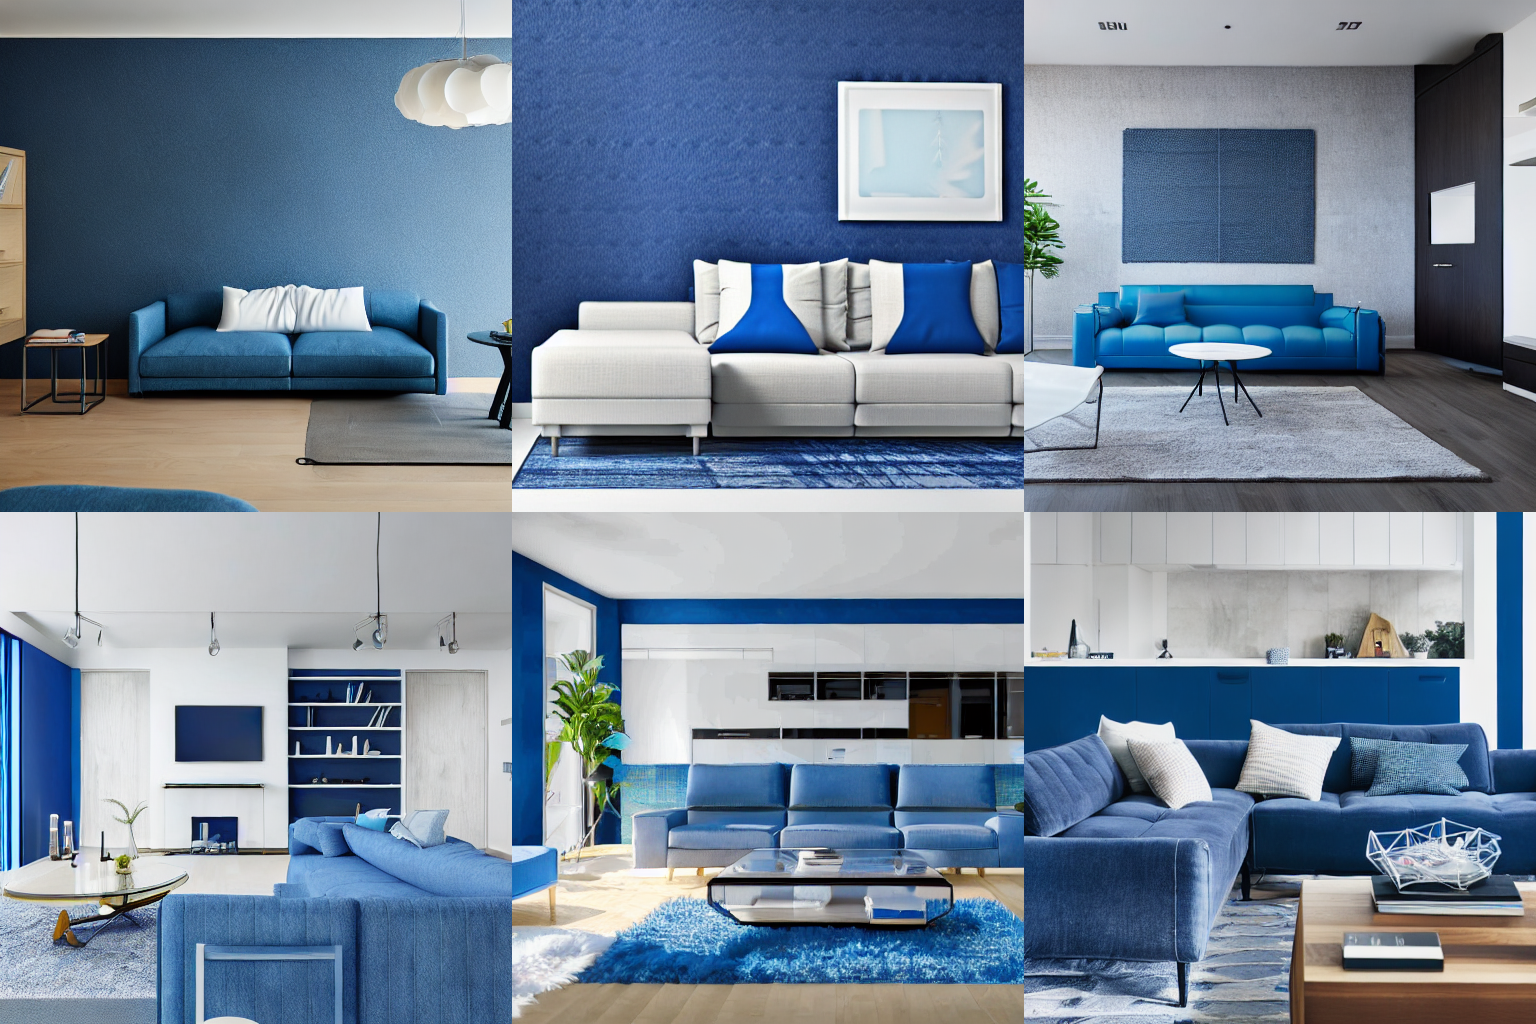

In [6]:
prompt = "a home with a modern furniture and blue theme, 4k, high detail"
h = 512
w = 512
n = 6

results = predict(prompt=prompt, img_height=h, img_width=w, num_imgs=n)

make_gallery(results, num_cols=3)
